<a href="https://colab.research.google.com/github/hikmatilloahatov/Azarbaijan-supermarkets-data-visualizations/blob/main/X%C9%99tai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019-yil uchun "Xətai" supermarketidagi savdo holati


In [56]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [57]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/X%C9%99tai.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,DR.GERARD 80GR KREKER BAGUETTES GARLIC&HERBS,Shirinliklar,1.65,2019-06-15,False
1,NID 15GR EDV.RAZYANA UYUDULMUS POSET,Ziravorlar,0.35,2019-06-15,False
2,LERIK BALI 300GR YENI,Shirinliklar,7.90,2019-05-18,False
3,KILIKYA ADANA 1LT SALGAM SUYU ACILI PL/Q,Mevali sharbatlar,2.70,2019-05-18,False
4,KOLBASA H.T MUBAH H/V VAKUM KG,Kolbasa va sosiskalar,11.15,2019-05-18,False
5,NES 800GR QIRMIZI MERCI POSET,Donli mahsulotlar,1.79,2019-05-18,False
6,ANI 40GR BRAWO DONUT KEKS BANANLI,Shirinliklar,0.30,2019-05-18,False
7,SIGARET KENT NANOTEK NEO 4,Tamaki mahsulotlari,3.30,2019-05-18,False
8,BIZIM SUFRE 250GR SOUS PENDIRLI PL/Q,Souslar,2.15,2019-05-18,False
9,PECENYE ZARQAND LAKOMKA KG,Shirinliklar,7.25,2019-05-18,False


In [58]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20938 entries, 0 to 20937
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   20938 non-null  object 
 1   mahsulot_turi   20938 non-null  object 
 2   mahsulot_narhi  20938 non-null  float64
 3   sotilgan_vaqti  20938 non-null  object 
 4   bonus_karta     20938 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 674.9+ KB


In [59]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [60]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20938 entries, 0 to 20937
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   20938 non-null  object        
 1   mahsulot_turi   20938 non-null  object        
 2   mahsulot_narhi  20938 non-null  float64       
 3   sotilgan_vaqti  20938 non-null  datetime64[ns]
 4   bonus_karta     20938 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 674.9+ KB


In [61]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2084
1915
2064
2042
2418
2013
2119
2201
2023
2031
28
0


In [62]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2084
1915
2064
2042
2418
2013
2119
2201
2023
2031
0
0


In [63]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,DR.GERARD 80GR KREKER BAGUETTES GARLIC&HERBS,Shirinliklar,1.65,2019-06-15,False
1,NID 15GR EDV.RAZYANA UYUDULMUS POSET,Ziravorlar,0.35,2019-06-15,False
2,LERIK BALI 300GR YENI,Shirinliklar,7.90,2019-05-18,False
3,KILIKYA ADANA 1LT SALGAM SUYU ACILI PL/Q,Mevali sharbatlar,2.70,2019-05-18,False
4,KOLBASA H.T MUBAH H/V VAKUM KG,Kolbasa va sosiskalar,11.15,2019-05-18,False
...,...,...,...,...,...
20933,DELISOGA QEND QABI,Maishiy buyumlar,8.09,2019-04-02,False
20934,HT SU QIZDIRICI BALACA,Maishiy buyumlar,1.75,2019-04-02,False
20935,JACOBS MONARCH 190GR KOFE S/Q,"Kofe, kakao va h.k",12.30,2019-04-02,False
20936,CALZE & CALZE CORAB KISI ART:2500 NO:01,Paypoq,3.20,2019-04-02,False


In [64]:
#9 2019-yilda "Xətai" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4785
Maishiy buyumlar,1130
"Yuvish vositalari, tozalagichlar",1019
Mevali sharbatlar,946
Idish-tovoq,826
...,...
Suzma,21
Tayyor ovqatlar,14
Muzlatilgan mahsulotlar,11
Shampan,8


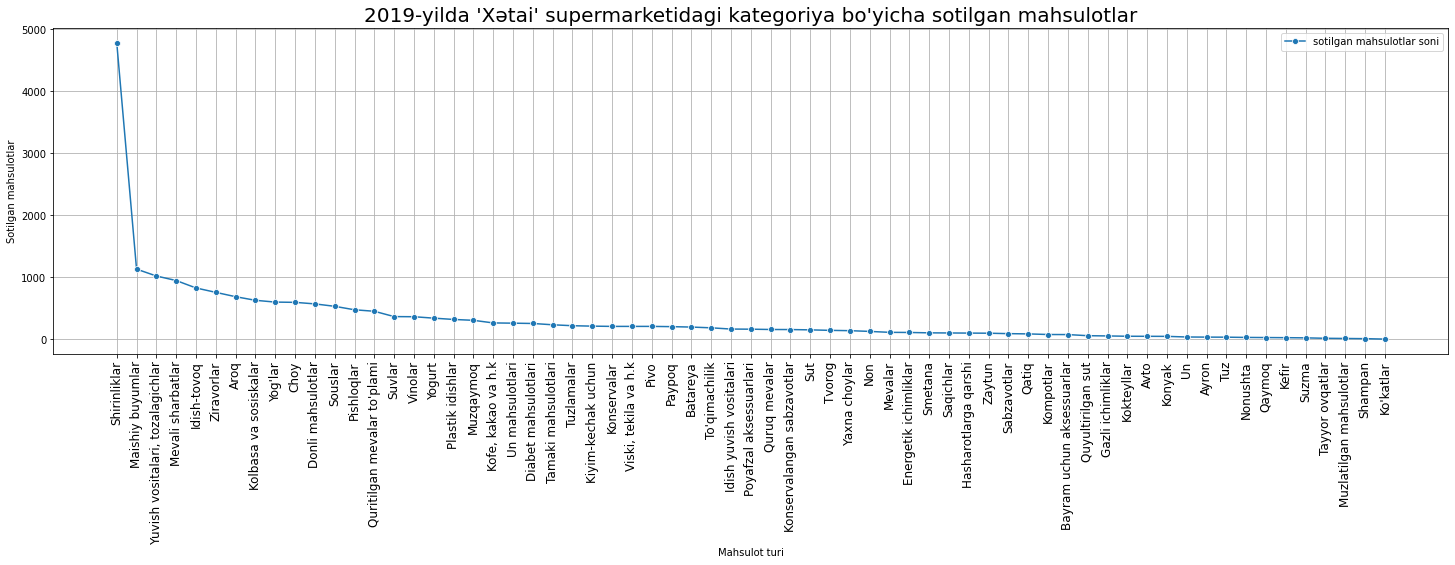

In [65]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda 'Xətai' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [66]:
#10 2019-yilda "Xətai" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,10122.33
Avto,212.13
Ayron,21.07
Batareya,732.15
Bayram uchun aksessuarlar,185.49
...,...
Yog'lar,5653.21
Yogurt,424.37


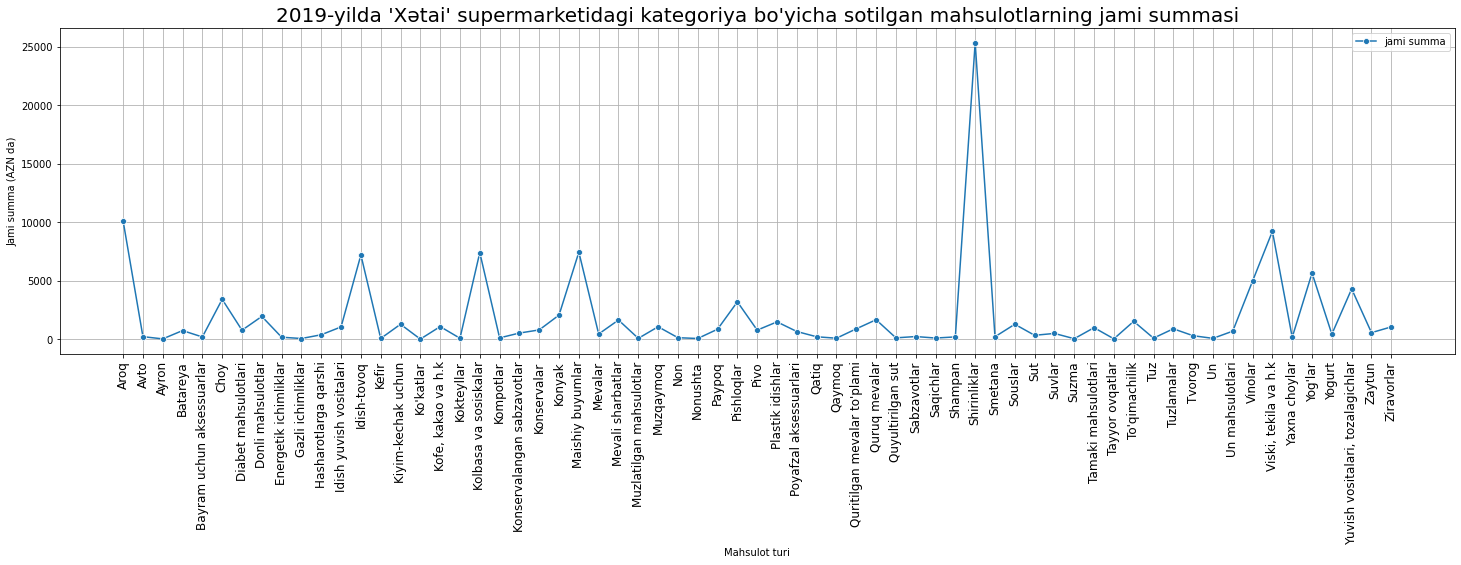

In [67]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda 'Xətai' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [68]:
#11 2019-yilda "Xətai" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10576,10334


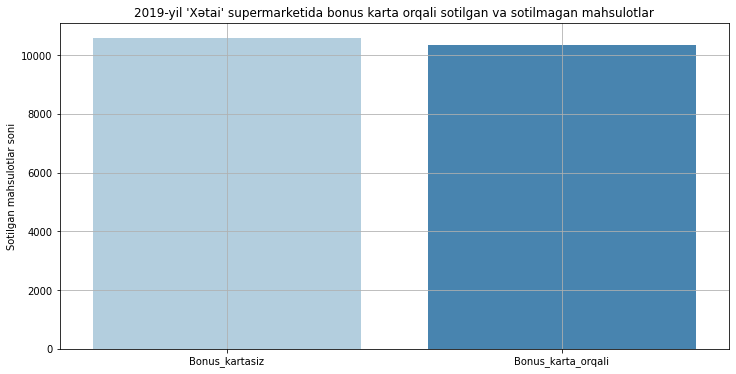

In [69]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil 'Xətai' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [70]:
#12 2019-yilda "Xətai" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2084
Fevral,1915
Mart,2064
Aprel,2042
May,2418
Iyun,2013
Iyul,2119
Avgust,2201
Sentabr,2023
Oktabr,2031


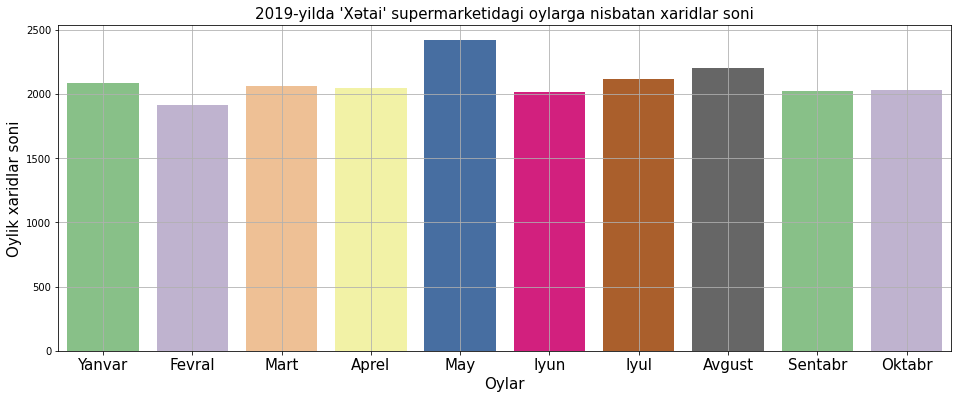

In [71]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda 'Xətai' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [72]:
#13 2019-yilda "Xətai" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,3093
Seshanba,3257
Chorshanba,2973
Payshanba,3027
Juma,3080
Shanba,2681
Yakshanba,2799


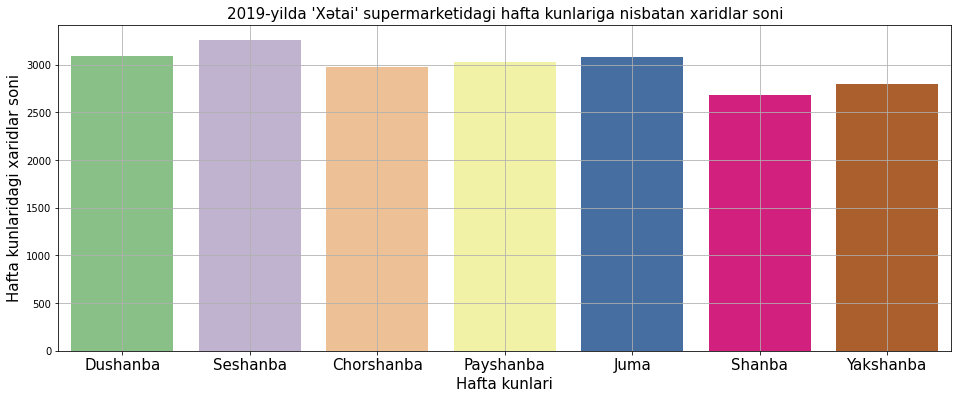

In [73]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda 'Xətai' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [74]:
#14 2019-yilda "Xətai" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,765
2,696
3,645
4,727
5,701
6,754
7,647
8,752
9,690
10,661


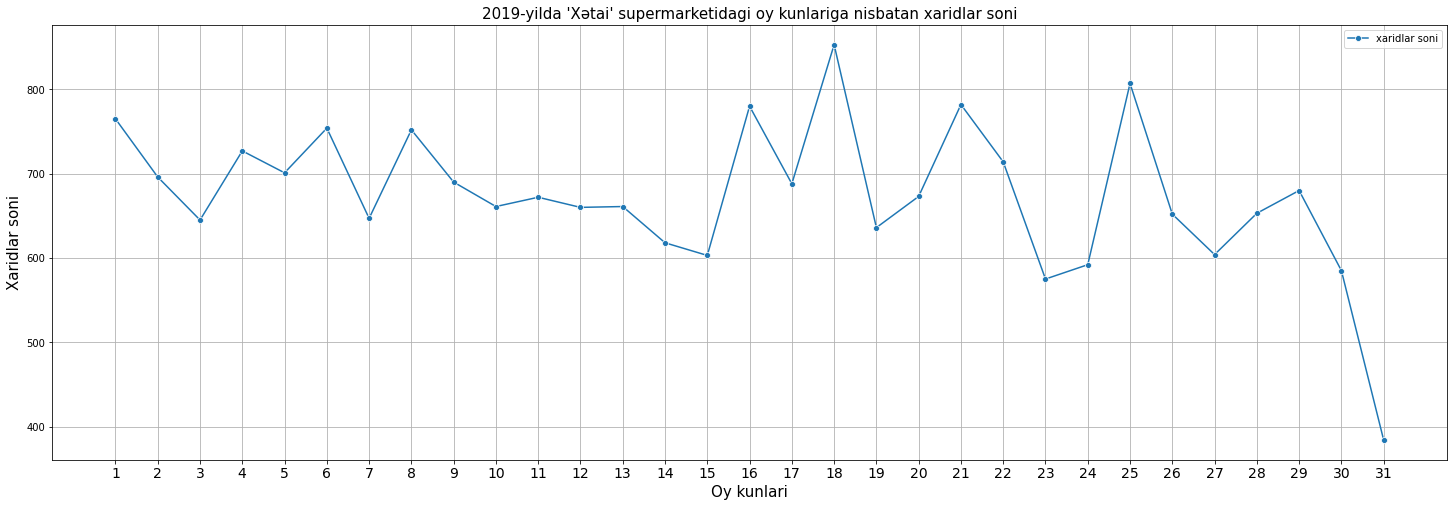

In [75]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda 'Xətai' supermarketidagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [76]:
#15 2019-yil 'Xətai' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [77]:
len(oy_sanalari)

310

In [78]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [79]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [80]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,123,87,62,115,62,84,56,66,42,34,54,82,91,61,65,52,81,75,32,79,101,94,31,67,44,50,57,76,59,44,58
Fevral,59,51,68,60,87,77,80,86,84,64,99,55,56,110,44,118,65,80,63,66,50,57,31,54,42,58,48,103,0,0,0
Mart,65,47,63,69,108,108,38,117,87,70,43,85,55,60,78,70,30,111,57,60,63,76,71,48,74,35,57,21,83,76,39
Aprel,97,89,64,43,93,54,62,66,54,54,54,94,84,42,61,80,53,55,82,17,76,68,68,102,131,97,51,39,56,56,0
May,65,74,61,65,68,138,123,90,62,77,82,88,96,48,87,94,60,84,64,65,124,53,48,70,68,82,80,59,70,96,77
Iyun,61,72,62,97,33,48,75,56,87,72,76,36,52,27,52,56,90,116,80,85,68,41,46,58,60,63,98,87,96,63,0
Iyul,50,61,129,50,49,71,31,49,69,59,57,54,74,73,38,102,102,91,51,87,70,83,36,29,110,91,47,60,115,78,53
Avgust,74,78,47,64,67,71,68,63,47,54,75,70,26,63,72,87,73,102,89,82,76,59,102,41,75,92,84,86,101,42,71
Sentabr,85,71,63,75,97,46,48,88,47,88,52,39,62,51,45,66,79,81,74,67,114,85,60,60,90,54,43,63,63,67,0
Oktabr,86,66,26,89,37,57,66,71,111,89,80,57,65,83,61,55,55,58,44,65,40,98,82,63,113,30,39,59,37,63,86


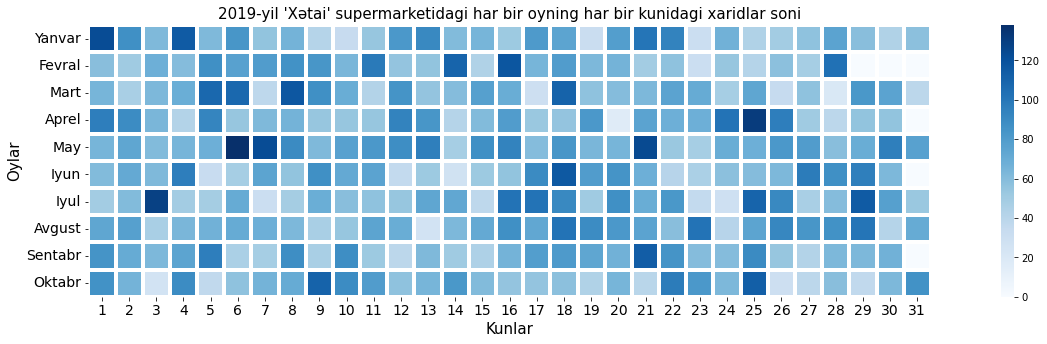

In [81]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil 'Xətai' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

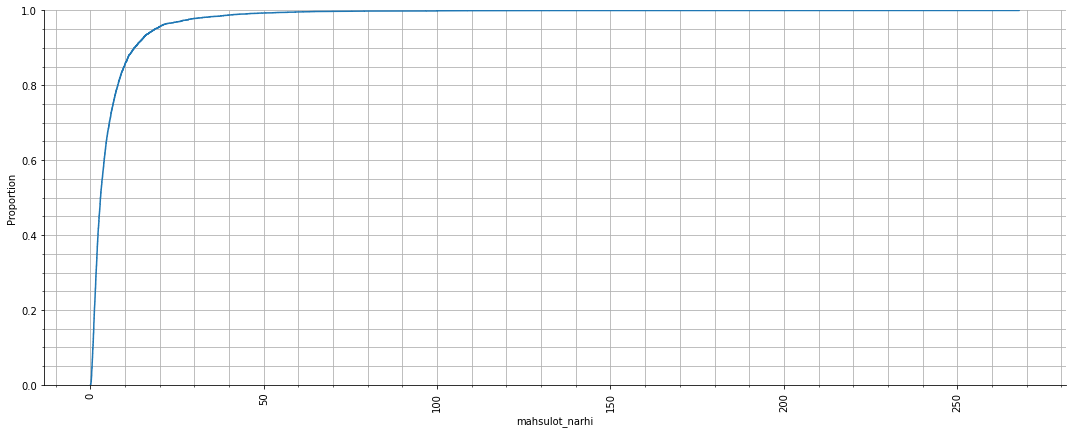

In [82]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 12 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()